In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df.head()
print(len(df))

336645


In [3]:
even_number = df["Even_number"].values.reshape(-1,1)

combination = df["combination"]


In [4]:
model = PoissonRegressor()
model.fit(even_number,combination)

PoissonRegressor()

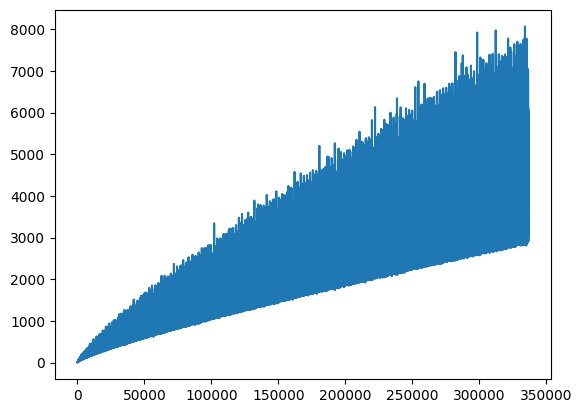

In [5]:

pred = model.predict(df["Even_number"].values.reshape(-1,1)[::10])

even_number_plt = df["Even_number"][::10]
combination_plt = df["combination"][::10]
plt.plot(combination_plt)



In [13]:

function_approx = np.poly1d(np.polyfit(df["Even_number"],combination,50))

function_approx(100)


/tmp/ipykernel_27016/551422539.py:1: RankWarning: Polyfit may be poorly conditioned
  function_approx = np.poly1d(np.polyfit(df["Even_number"],combination,50))


17.538734482571854

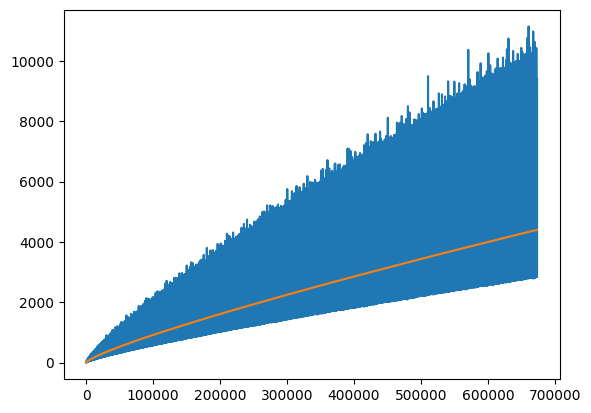

In [15]:

values = map(function_approx,df["Even_number"])
plt.plot(df["Even_number"],combination)
plt.plot(df["Even_number"],list(values))
